# Google Trends Analysis:
## How did yoga's popularity change in the last 14 years?

Yoga is a great passion of mine, so I decided to take a look at how did it's popularity change since 2004 based on google search data obtained from google trends.

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('~/Desktop/data.csv', skiprows=1)
df.head()

,Hónap,finance: (Világszerte),yoga: (Világszerte),diet: (Világszerte)
0,2004-01,47,38,100
1,2004-02,49,36,75
2,2004-03,47,33,72
3,2004-04,48,30,71
4,2004-05,44,30,74


In [3]:
#Renaming the columns for better readability
df.columns = ['Month','Finance', 'Yoga', 'Diet']
df.head()

,Month,Finance,Yoga,Diet
0,2004-01,47,38,100
1,2004-02,49,36,75
2,2004-03,47,33,72
3,2004-04,48,30,71
4,2004-05,44,30,74


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
Month      169 non-null object
Finance    169 non-null int64
Yoga       169 non-null int64
Diet       169 non-null int64
dtypes: int64(3), object(1)
memory usage: 5.4+ KB


In [5]:
#Month data is not in pd.datetime format, let's convert it
df.Month= pd.to_datetime(df.Month)
df.set_index(df.Month, inplace=True)

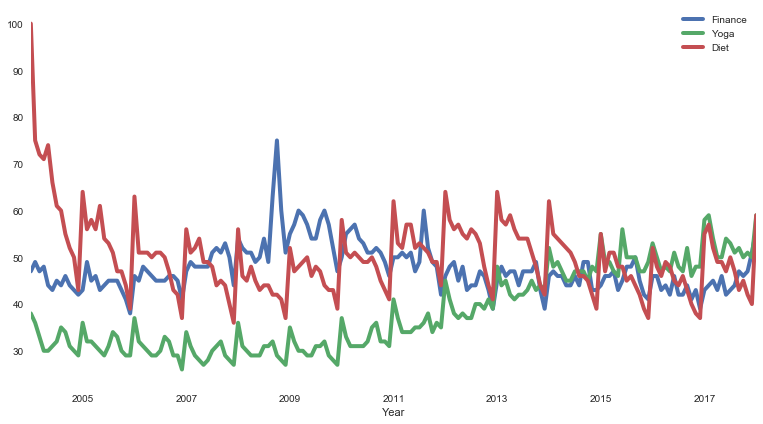

In [6]:
df.plot(figsize=(13,7), linewidth=4,);
plt.xlabel('Year');
ax=plt.gca()
ax.set_facecolor('white')

### Notes:
We can observe a seasonal component and a trend in the searchword's popularity. There's an annual peak in 'Diet' and 'Yoga', most probably in January as a result of New Year's resolution. 'Finance' was choosen as a 'control' searchword which shown no sign of seasonality. 
Let's plot the data again to confirm this.

In [7]:
#Preparing the x_ticky array and labels for the plot
x_1 = pd.date_range('1/1/2004','2/1/2018', freq='M').strftime('%b') 
x_2 = + pd.date_range('1/1/2004','2/1/2018', freq='M').strftime('%Y')
length = 366*3+365*9
df.Month =np.arange(0,length,26)
x_ticklabel = list(zip(x_1,x_2))
x_ticklabels=[]
for items in x_ticklabel:
    x_ticklabels.append(str(items[0])+' '+str(items[1]))

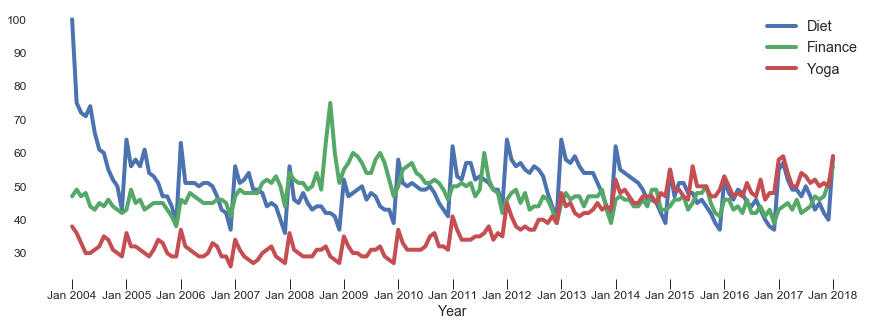

In [8]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(df.Month, df.Diet, linewidth=4);
plt.plot(df.Month, df.Finance, linewidth=4)
plt.plot(df.Month, df.Yoga, linewidth=4)
#plt.plot(df.Yoga,linewidth=4)
plt.legend(fontsize="large");
ax.set_facecolor('white')
plt.xlabel('Year', size=14);
plt.tick_params(labelsize=12)
ax.set_xticks(df.Month);
ax.set_xticklabels(x_ticklabels, size=5);
n = 12  #Set every 12th month label visible
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0];
ax.set_xticks(np.arange(0, 4389, 26));
ax.tick_params(axis='x',direction='out', length=10, pad=2,width=1)
j=0
for tic in ax.xaxis.get_major_ticks(): #Set every 12th tick label visible
    if j%12 != 0:
        tic.tick1On = tic.tick2On = False
    j =j+1

#### Notes:
The interest towards 'Yoga' and 'Diet' has an annual peak in January and a low point in December. 'Finance' does not show similar seasonal pattern. There's a clear peak in the fall of 2008 when the global economic crisis started.
In order to identify the trends in the interest towards the keywords without the seasonal component, we can take the rolling averages of our data:

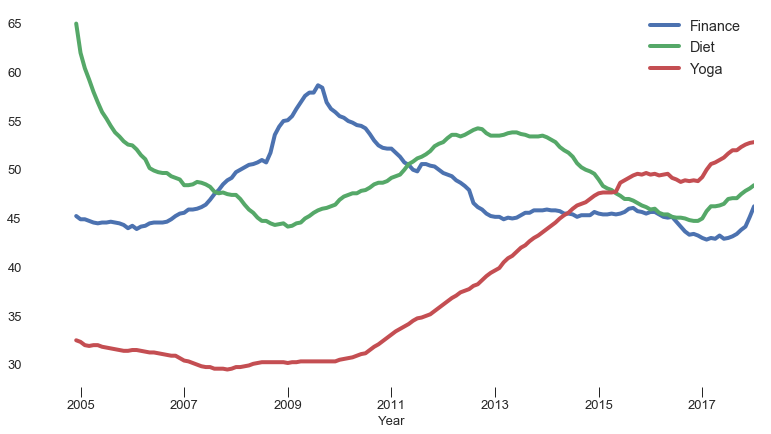

In [9]:
df['Finance'].rolling(12).mean().plot(figsize=(13,7), linewidth=4);
df['Diet'].rolling(12).mean().plot(linewidth=4)
df['Yoga'].rolling(12).mean().plot(linewidth=4)
ax = plt.gca()
ax.set_facecolor('white')
ax.legend(fontsize='large');
plt.tick_params(labelsize=13)
ax.tick_params(axis='x',direction='out', length=10, pad=2,width=1)
plt.xlabel('Year',size=13);

Although there's no straithforward trend in the popularity of 'Diet', there's an obvious increase in the interest towards yoga which is great to see. We can also see a peak in 'Finance' in 2009-10 which could be the impact of the global economic crisis.

Let's investigate the seasonal patterns using first-order differencing:

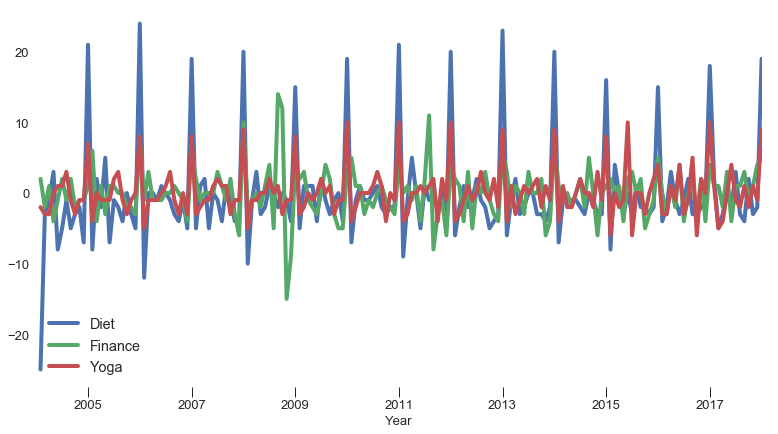

In [10]:
df['Diet'].diff().plot(figsize=(13,7), linewidth=4);
df['Finance'].diff().plot(figsize=(13,7), linewidth=4);
df['Yoga'].diff().plot(figsize=(13,7), linewidth=4);
ax=plt.gca()
ax.legend(fontsize='large')
ax.set_facecolor('white')
plt.tick_params(labelsize=13)
ax.tick_params(axis='x',direction='out', length=10, pad=2,width=1)
ax.set_xlabel('Year',size=13);

The seasonality of the interest in yoga and diet is periodic and strongly correlated with each other while finance showns no obvious seasonal pattern. Let's compute the correlation coefficients:

In [11]:
df.drop('Month', axis=1, inplace=True)
df.corr()

,Finance,Yoga,Diet
Finance,1.000000,-0.359229,-0.032562
Yoga,-0.359229,1.000000,0.009931
Diet,-0.032562,0.009931,1.000000


Examining the raw data we see now correlation in the search words' popularity. The same correlation with removing the trend in the data:

In [12]:
df.diff().corr()

,Finance,Yoga,Diet
Finance,1.000000,0.311671,0.343530
Yoga,0.311671,1.000000,0.755244
Diet,0.343530,0.755244,1.000000


After first-order differencing we can observe a strong correlation in the seasonal popularity of 'Yoga' and 'Diet'. 
Although the seasonal interest might not have a long term effect, the continously increasing interest towards Yoga is great to see. I firmly believe that our world will be a happier place if more and more people engage with this powerful practice every year:)